In [40]:
import pandas as pd
import numpy as np
import re
import datetime
from sklearn.cluster import KMeans

In [58]:
def create_submission_df(crash_data_df, date_start='2019-07-01', date_end='2020-01-01'):
    '''Takes crash data and creates a data frame in the format needed for submission'''
    
    #calculate centroid for ambulance placement
    #lat_centroid = list(crash_data_df.latitude.quantile(q=[1/7,2/7,3/7,4/7,5/7,6/7]))
    #lon_centroid = list(crash_data_df.longitude.quantile(q=[1/7,2/7,3/7,4/7,5/7,6/7]))
    
    # create 6 points on a grid
    #lat_centroid = list(crash_data_df.latitude.quantile(q=[1/4,2/4,3/4]))
    #lon_centroid = list(crash_data_df.longitude.quantile(q=[1/3,2/3]))
    #centroids = [(lat,lon) for lat in lat_centroid for lon in lon_centroid]
    
    # star of david grid
    #lat_centroid = list(crash_data_df.latitude.quantile(q=[1/5,2/5,3/5,4/5]))
    #lon_centroid = list(crash_data_df.longitude.quantile(q=[1/4,2/4,3/4]))
    #centroids=[(lat_centroid[1],lon_centroid[0]),(lat_centroid[2],lon_centroid[0]),
    #           (lat_centroid[0],lon_centroid[1]),(lat_centroid[3],lon_centroid[1]),
    #           (lat_centroid[1],lon_centroid[2]),(lat_centroid[2],lon_centroid[2])]
    
    # Create centroids via k-means
    kmeans = KMeans(n_clusters=6, verbose=0, tol=1e-3, max_iter=100, n_init=20, copy_x= True)
    kmeans.fit(crash_data_df[['latitude','longitude']])
    centroids = kmeans.cluster_centers_
    
    # Create Date range covering submission period set
    dates = pd.date_range(date_start, date_end, freq='3h')
        
    # Create submission dataframe
    submission_df = pd.DataFrame({'date':dates})
    #submission_df['weekday'] = submission_df['date'].apply
    for ambulance in range(6):
        # Place an ambulance in the center of the city:
        submission_df['A'+str(ambulance)+'_Latitude'] = centroids[ambulance][0]
        submission_df['A'+str(ambulance)+'_Longitude'] = centroids[ambulance][1]
    return submission_df

In [27]:
def create_submission_csv(submission_df, model_name='baseline', path='../Outputs/'):
    '''Takes dataframe in submission format and outputs a csv file with matching name'''
    current_time = datetime.datetime.now()
    filename = f'{current_time.year}{current_time.month}{current_time.day}_{model_name}.csv'
    submission_df.to_csv(path+filename,index=False)

In [33]:
# Load raw crash data from csv
crash_data_df = pd.read_csv('../Inputs/Train.csv', parse_dates=['datetime'])

In [35]:
crash_data_df.head()

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


In [9]:
# for simple qunatile grid we want to know which dimension is more widely spread and make that the dim with 3  We will use wider dimension to have 3 points and the other 2
display(crash_data_df.describe().round(4))
print(f'latitutude range is {crash_data_df.latitude.max()-crash_data_df.latitude.min()})
print(f'longitude range is {crash_data_df.longitude.max()-crash_data_df.longitude.min()})

,uid,latitude,longitude
count,6318.0000,6318.0000,6318.0000
mean,3159.5000,-1.2703,36.8555
std,1823.9938,0.1252,0.1129
min,1.0000,-3.0500,36.3322
25%,1580.2500,-1.3166,36.8020
50%,3159.5000,-1.2717,36.8446
75%,4738.7500,-1.2337,36.8956
max,6318.0000,-0.5654,37.8795


2.4845976883566063
1.5472883973901048


In [59]:
# call function to create submission df and csv output
submission_df = create_submission_df(crash_data_df)
create_submission_csv(submission_df,'star_grid')

In [50]:
# View contents of submission
submission_df.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,-1.447529,37.040151,-2.269933,37.385892,-1.233308,36.72099,-0.97529,37.087235,-1.19904,36.922061,-1.298335,36.840378
1,2019-07-01 03:00:00,-1.447529,37.040151,-2.269933,37.385892,-1.233308,36.72099,-0.97529,37.087235,-1.19904,36.922061,-1.298335,36.840378
2,2019-07-01 06:00:00,-1.447529,37.040151,-2.269933,37.385892,-1.233308,36.72099,-0.97529,37.087235,-1.19904,36.922061,-1.298335,36.840378
3,2019-07-01 09:00:00,-1.447529,37.040151,-2.269933,37.385892,-1.233308,36.72099,-0.97529,37.087235,-1.19904,36.922061,-1.298335,36.840378
4,2019-07-01 12:00:00,-1.447529,37.040151,-2.269933,37.385892,-1.233308,36.72099,-0.97529,37.087235,-1.19904,36.922061,-1.298335,36.840378


In [11]:
# functions for saving post submission details to a dataframe
def get_submission_details(copypaste):
    split_input = re.split("\s", copypaste)
    id_str = split_input[0]
    score_float = split_input[-1]
    file_name = filename = re.findall('\w*.csv\w*', copypaste)[-1]
    comment_str = ''
    submitted_datetime = ''
    submission_row = [id_str, file_name, score_float, submitted_datetime, comment_str]
    return submission_row
def submission_dataframe(rows,columns=['ID', 'FILE', 'SCORE', 'SUBMITTED', 'COMMENT']):
    return pd.DataFrame(data=[rows], columns = columns)

def create_dataframe(copypaste):
    return submission_dataframe(get_submission_details(copypaste))

# the below needs work
def add_to_submission_dataframe(df, rows, columns=['ID', 'FILE', 'SCORE', 'SUBMITTED', 'COMMENT']):
    return df.append(zip([columns,rows]), ignore_index=True)

def update_dataframe(df, copypaste):
    rows = get_submission_details(copypaste)
    return add_to_submission_dataframe(df, rows)

In [12]:
def plot_ambulances(crash_data_df):
    lat_centroid = list(crash_data_df.latitude.quantile(q=[1/7,2/7,3/7,4/7,5/7,6/7]))
    lon_centroid = list(crash_data_df.longitude.quantile(q=[1/7,2/7,3/7,4/7,5/7,6/7]))
    fig, axs = plt.subplots(figsize=(16, 10))

    plt.scatter(x = crash_data_df['latitude'], y=crash_data_df['longitude'], s=1, label='Crash locations' )
    plt.scatter(x=lat_centroid, y=lon_centroid, marker="x",
                color='r',label='Ambulances locations',s=100)
    axs.set_title('Scatter plot : Ambulaces locations vs Crash locations ')
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    plt.legend()
    plt.show()



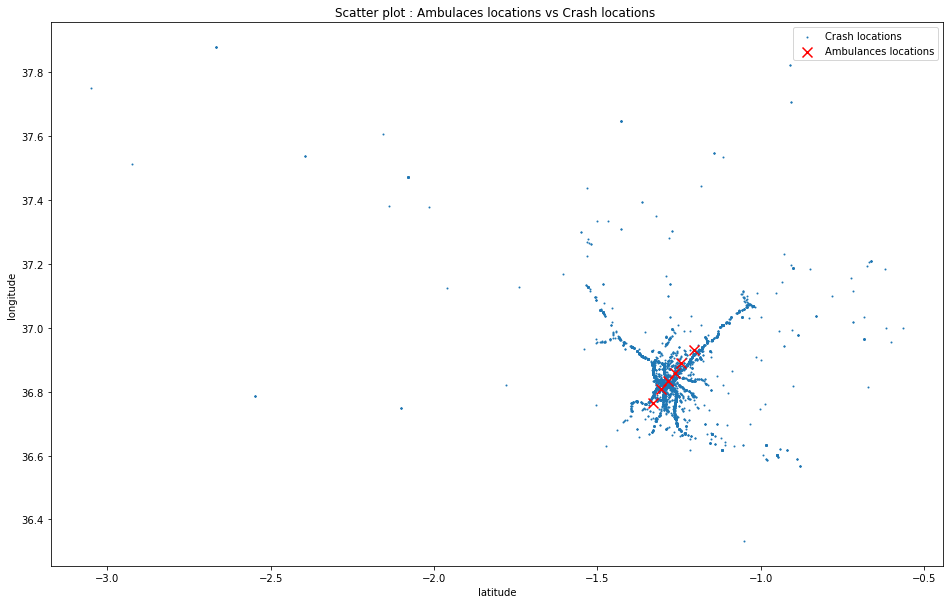

In [13]:
plot_ambulances(crash_data_df)